In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/renatabatista/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/renatabatista/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import os

print(os.getcwd())


/Users/renatabatista/Other Docs/Germany/CareerFoundry/Data Specialization/JupyterLab/20th-century


In [16]:
with open("/Users/renatabatista/Other Docs/Germany/CareerFoundry/Data Specialization/JupyterLab/20th-century/20th_century_events.txt", "r", encoding="utf-8") as f:
    text = f.read()


In [17]:
import os
print(os.getcwd())


/Users/renatabatista/Other Docs/Germany/CareerFoundry/Data Specialization/JupyterLab/20th-century


In [18]:
FILENAME = "20th_century_events.txt"

with open(FILENAME, "r", encoding="utf-8") as f:
    text = f.read()

print("Number of characters in file:", len(text))
print("First 500 characters of text:\n")
print(text[:500])


Number of characters in file: 96901
First 500 characters of text:

This is a timeline of the 20th century .
1900s
1901
January 1 : The Australian colonies federate .
January 22 : Edward VII became King of England and India after Queen Victoria 's death.
March 2 : The Platt Amendment provides for Cuban independence in exchange for the withdrawal of American troops.
June : Emily Hobhouse reports on the poor conditions in 45 British internment camps for Boer women and children in South Africa .
September 6 : The assassination of William McKinley ushered in office 


Number of words in text: 18048
Sample words: ['this', 'is', 'a', 'timeline', 'of', 'the', '20th', 'century', '.', '1900s', '1901', 'january', '1', ':', 'the', 'australian', 'colonies', 'federate', '.', 'january']
10 most common words: [('.', 1184), ('the', 1129), (':', 1011), ('of', 737), (',', 491), ('in', 420), ('and', 253), ('first', 172), ('to', 160), ('a', 159)]


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/renatabatista/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


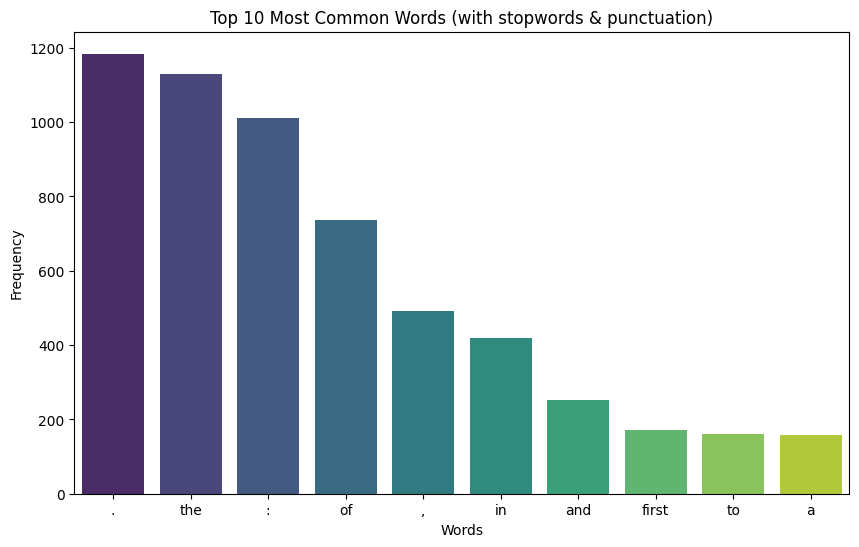

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure punkt tokenizer is available
nltk.download('punkt')

# Step 4: Tokenize the words
words = word_tokenize(text.lower())  # lowercase for consistency
print("Number of words in text:", len(words))
print("Sample words:", words[:20])

# Get frequency distribution
fdist = FreqDist(words)

# Get 10 most common words
common_words = fdist.most_common(10)
print("10 most common words:", common_words)

# Convert to lists for plotting
words_list, counts = zip(*common_words)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(words_list), y=list(counts), palette="viridis")
plt.title("Top 10 Most Common Words (with stopwords & punctuation)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


Number of filtered words: 9905
Sample filtered words: ['timeline', '20th', 'century', '1900s', '1901', 'january', 'australian', 'colonies', 'federate', 'january', 'edward', 'vii', 'became', 'king', 'england', 'india', 'queen', 'victoria', 'death', 'march']
10 most common words (after cleaning): [('first', 172), ('war', 153), ('begins', 120), ('march', 106), ('october', 106), ('may', 105), ('september', 100), ('july', 97), ('november', 96), ('april', 92)]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/renatabatista/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


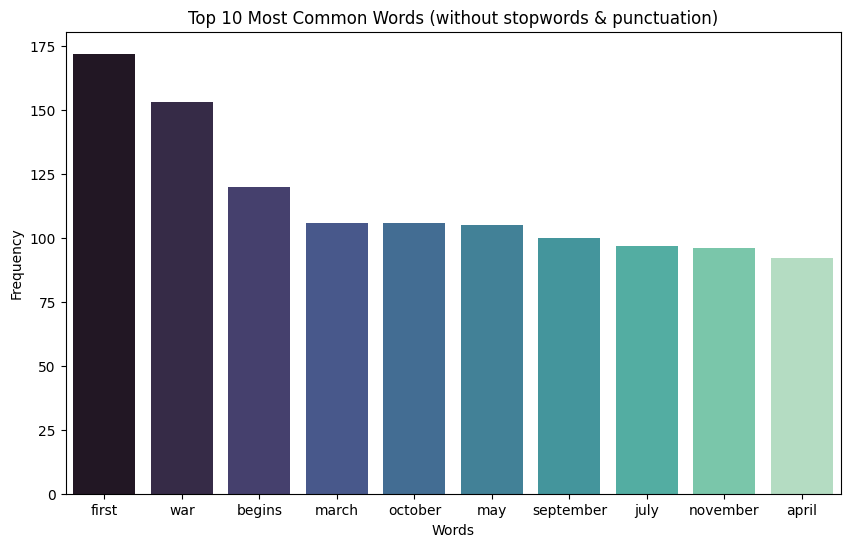

In [20]:
from nltk.corpus import stopwords
import string

# Download stopwords if not already
nltk.download('stopwords')

# Define stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Filter words (remove stopwords + punctuation + very short tokens)
filtered_words = [w for w in words if w not in stop_words and w not in punctuation and len(w) > 2]

print("Number of filtered words:", len(filtered_words))
print("Sample filtered words:", filtered_words[:20])

# Frequency distribution again
fdist_filtered = FreqDist(filtered_words)

# Get 10 most common words after cleaning
common_filtered = fdist_filtered.most_common(10)
print("10 most common words (after cleaning):", common_filtered)

# Plot
words_list, counts = zip(*common_filtered)
plt.figure(figsize=(10,6))
sns.barplot(x=list(words_list), y=list(counts), palette="mako")
plt.title("Top 10 Most Common Words (without stopwords & punctuation)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [23]:
from textblob import TextBlob

# Create a TextBlob object from the cleaned text
blob = TextBlob(" ".join(filtered_words))

# Extract tags (word, POS)
tags = blob.tags

# Show first 20 tags as a sample
tags[:20]


[('timeline', 'NN'),
 ('20th', 'JJ'),
 ('century', 'NN'),
 ('1900s', 'CD'),
 ('1901', 'CD'),
 ('january', 'JJ'),
 ('australian', 'JJ'),
 ('colonies', 'NNS'),
 ('federate', 'VBP'),
 ('january', 'JJ'),
 ('edward', 'RB'),
 ('vii', 'NN'),
 ('became', 'VBD'),
 ('king', 'JJ'),
 ('england', 'NN'),
 ('india', 'NN'),
 ('queen', 'JJ'),
 ('victoria', 'NNS'),
 ('death', 'NN'),
 ('march', 'NN')]

In [24]:
from collections import Counter
import pandas as pd

# Count frequencies of POS tags
pos_counts = Counter(tag for word, tag in tags)

# Convert to DataFrame for easier handling
pos_df = pd.DataFrame(pos_counts.items(), columns=["POS", "Count"])

# Sort by count and take top 10
top10_pos = pos_df.sort_values(by="Count", ascending=False).head(10)

# Show results
top10_pos


,POS,Count
0,NN,3857
1,JJ,2446
3,NNS,822
7,VBZ,455
2,CD,385
4,VBP,369
6,VBD,308
5,RB,268
13,VBG,217
8,VB,158


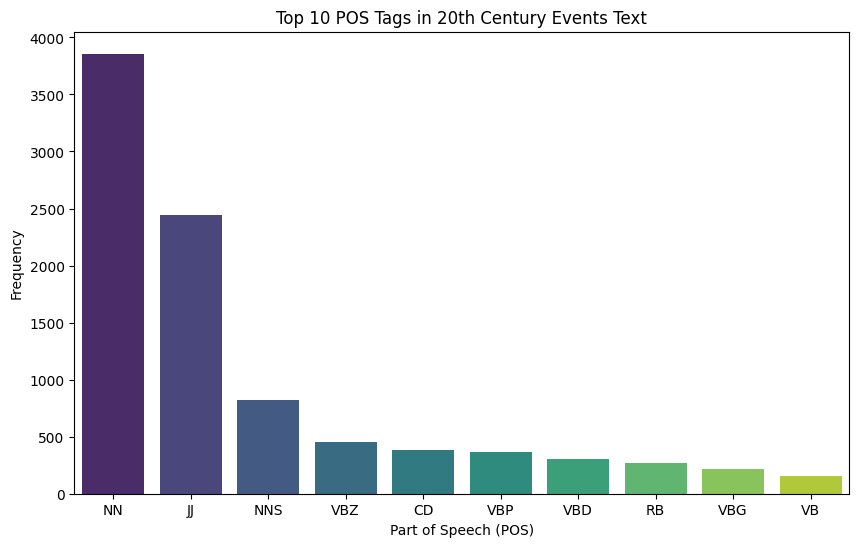

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the Top 10 POS tags
plt.figure(figsize=(10,6))
sns.barplot(x="POS", y="Count", data=top10_pos, palette="viridis")

plt.title("Top 10 POS Tags in 20th Century Events Text")
plt.xlabel("Part of Speech (POS)")
plt.ylabel("Frequency")
plt.show()


From the bar chart of the Top 10 POS tags:

Nouns (NN, NNS) are the most frequent. This makes sense because the dataset is a historical timeline, filled with names of people, places, and events.
Adjectives (JJ) are also very common. They describe qualities of events or conditions, which is typical in descriptive historical text.
Cardinal numbers (CD) appear frequently, reflecting years, dates, and numeric references in the timeline.
Verbs (VBZ, VBD, VBP, etc.) are present but less dominant, since the dataset is more focused on facts (nouns and dates) than on actions.

Overall, the distribution confirms that the text is primarily fact-based and descriptive, which aligns with the style of a historical timeline.

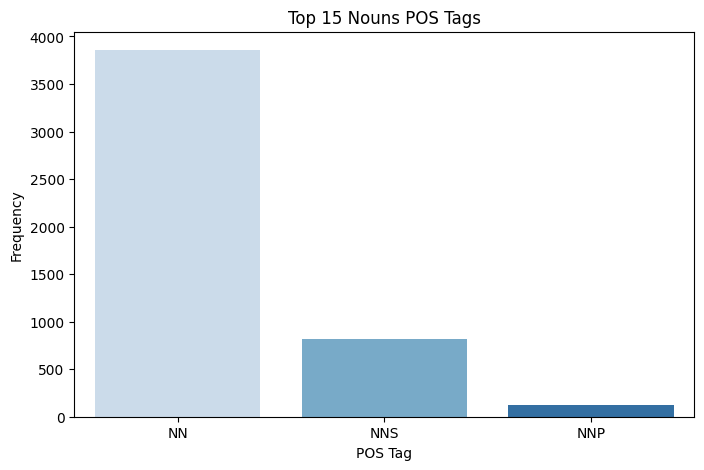

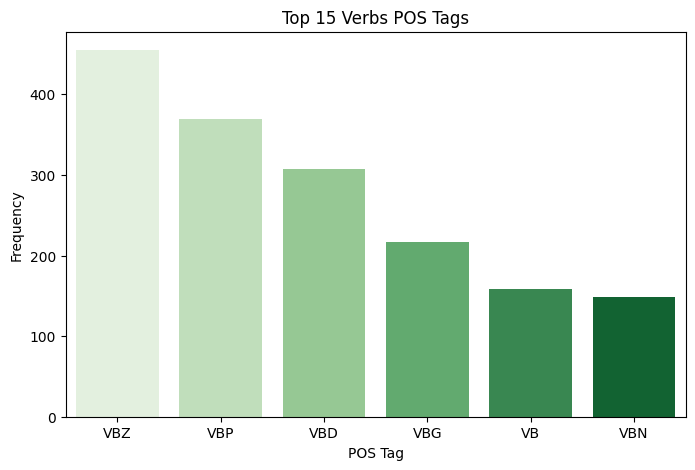

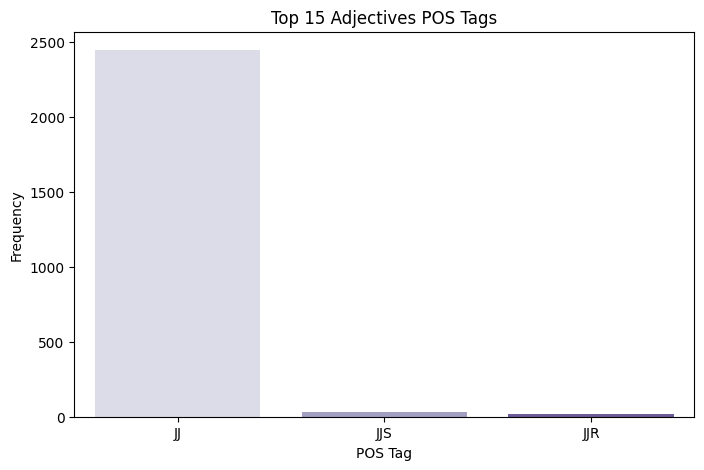

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Group POS tags ---
# Define POS categories
noun_tags = ["NN", "NNS", "NNP", "NNPS"]
verb_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
adj_tags = ["JJ", "JJR", "JJS"]

# Filter DataFrame by category
nouns = pos_df[pos_df["POS"].isin(noun_tags)].sort_values(by="Count", ascending=False).head(15)
verbs = pos_df[pos_df["POS"].isin(verb_tags)].sort_values(by="Count", ascending=False).head(15)
adjectives = pos_df[pos_df["POS"].isin(adj_tags)].sort_values(by="Count", ascending=False).head(15)

# --- Plot function ---
def plot_top15(df, title, color):
    plt.figure(figsize=(8,5))
    sns.barplot(x="POS", y="Count", data=df, palette=color)
    plt.title(f"Top 15 {title} POS Tags")
    plt.xlabel("POS Tag")
    plt.ylabel("Frequency")
    plt.show()

# --- Generate Plots ---
plot_top15(nouns, "Nouns", "Blues")
plot_top15(verbs, "Verbs", "Greens")
plot_top15(adjectives, "Adjectives", "Purples")


Observations:

Nouns:
The noun tags (NN, NNS, NNP, NNPS) are by far the most frequent. This aligns with the dataset’s structure — a historical timeline filled with names, places, and events. The dominance of common nouns (NN) and plural nouns (NNS) suggests factual descriptions.

Verbs:
Verbs are less frequent compared to nouns, but the presence of forms like VBD (past tense) and VBZ (present tense, 3rd person singular) shows that the text emphasizes reporting historical actions and outcomes (e.g., "was declared," "became," "started").

Adjectives:
Adjectives are relatively frequent, which highlights the descriptive nature of historical writing. They often add context (e.g., "great war," "new constitution"). However, their frequency is still lower than nouns, reflecting the timeline’s focus on facts rather than subjective descriptions.

What stands out most:

The huge dominance of nouns compared to verbs and adjectives. This matches expectations because the timeline is event- and entity-driven rather than narrative-driven. The verbs, while fewer, provide the necessary historical actions, and adjectives add descriptive depth.

,Country,Mentions
0,united states,67
1,united kingdom,42
2,china,33
3,soviet union,25
4,japan,22
5,germany,21
6,france,16
7,russia,16
8,iran,16
9,india,15


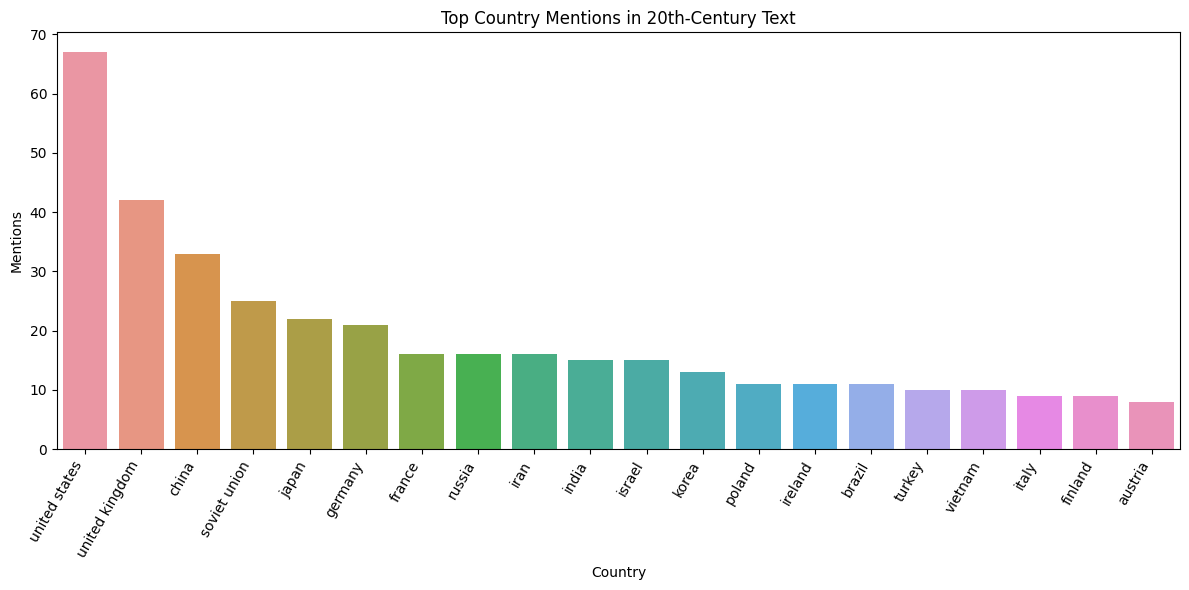

In [30]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Canonical country names (lower-case) ---
countries = [
    # Core 20th-century actors
    "united states", "united kingdom", "germany", "france", "italy", "spain",
    "russia", "soviet union", "china", "japan", "india", "canada", "australia",
    "poland", "austria", "hungary", "netherlands", "belgium", "switzerland",
    "sweden", "norway", "denmark", "finland", "greece", "portugal", "ireland",
    "czechoslovakia", "yugoslavia", "turkey", "israel", "egypt", "iran", "iraq",
    "saudi arabia", "pakistan", "bangladesh", "korea", "south korea", "north korea",
    "vietnam", "indonesia", "philippines", "thailand",
    "mexico", "brazil", "argentina", "chile", "south africa",
    # Add any others you care about:
    "ukraine", "belarus", "estonia", "latvia", "lithuania", "czech republic",
    "slovakia", "croatia", "serbia", "bosnia and herzegovina", "slovenia"
]

# --- Alias -> canonical (all lower-case) ---
aliases = {
    # UK
    "uk": "united kingdom", "u.k.": "united kingdom",
    "great britain": "united kingdom", "britain": "united kingdom", "england": "united kingdom",
    # USA
    "u.s.": "united states", "u.s.a.": "united states", "usa": "united states",
    "america": "united states", "united states of america": "united states",
    # Germany
    "frg": "germany", "gdr": "germany", "west germany": "germany", "east germany": "germany",
    # Russia/USSR
    "ussr": "soviet union", "u.s.s.r.": "soviet union",
    "union of soviet socialist republics": "soviet union",
    "russian empire": "russia",
    # China
    "prc": "china", "people's republic of china": "china", "roc": "china", "republic of china": "china",
    # Turkey / Ottoman
    "ottoman empire": "turkey", "ottoman": "turkey",
    # Burma / Myanmar, Ceylon / Sri Lanka, Siam / Thailand, Formosa / Taiwan (optional)
    "burma": "myanmar" if "myanmar" in countries else "burma",
    "ceylon": "sri lanka" if "sri lanka" in countries else "ceylon",
    "siam": "thailand",
    "formosa": "taiwan" if "taiwan" in countries else "formosa",
    # Korea variants
    "republic of korea": "south korea", "rok": "south korea",
    "dprk": "north korea", "democratic people's republic of korea": "north korea",
    # Middle East
    "persia": "iran", "transjordan": "jordan" if "jordan" in countries else "transjordan",
    # Netherlands / Holland
    "holland": "netherlands",
    # Ireland
    "eire": "ireland", "irish free state": "ireland",
    # Indonesia
    "dutch east indies": "indonesia",
    # Tanzania
    "tanganyika": "tanzania" if "tanzania" in countries else "tanganyika",
    "zanzibar": "tanzania" if "tanzania" in countries else "zanzibar",
    # Congo
    "zaire": "dr congo" if "dr congo" in countries else "zaire",
}
# 1) normalize text
text_lc = text.lower()

# 2) replace aliases with their canonical form (longest first to avoid partial overlaps)
for alias, canon in sorted(aliases.items(), key=lambda kv: len(kv[0]), reverse=True):
    pattern = r"\b" + re.escape(alias) + r"\b"
    text_lc = re.sub(pattern, canon, text_lc, flags=re.IGNORECASE)

# 3) count canonical countries with word-boundary regex
counts = {}
for country in countries:
    pattern = r"\b" + re.escape(country) + r"\b"
    n = len(re.findall(pattern, text_lc, flags=re.IGNORECASE))
    if n:
        counts[country] = n

country_df = (
    pd.DataFrame(sorted(counts.items(), key=lambda x: x[1], reverse=True),
                 columns=["Country", "Mentions"])
    .reset_index(drop=True)
)

display(country_df.head(25))

# 4) plot top 20
plt.figure(figsize=(12,6))
sns.barplot(data=country_df.head(20), x="Country", y="Mentions")
plt.title("Top Country Mentions in 20th-Century Text")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()


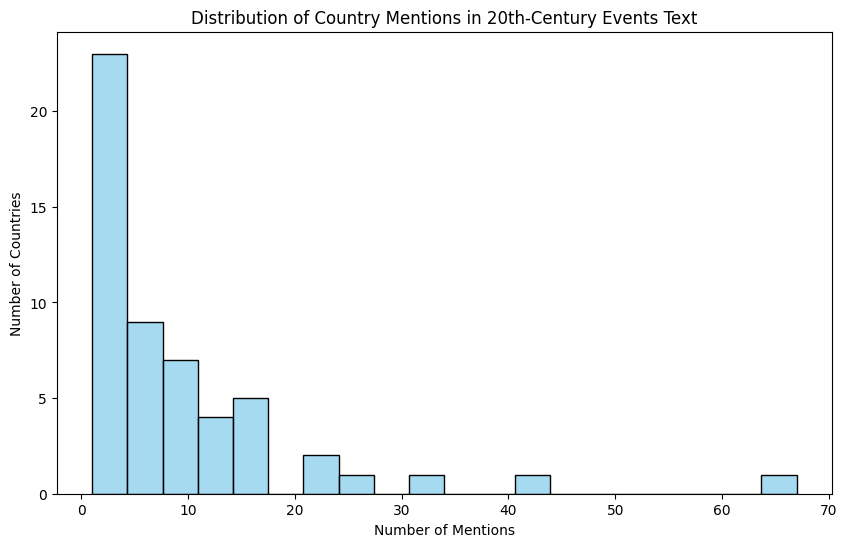

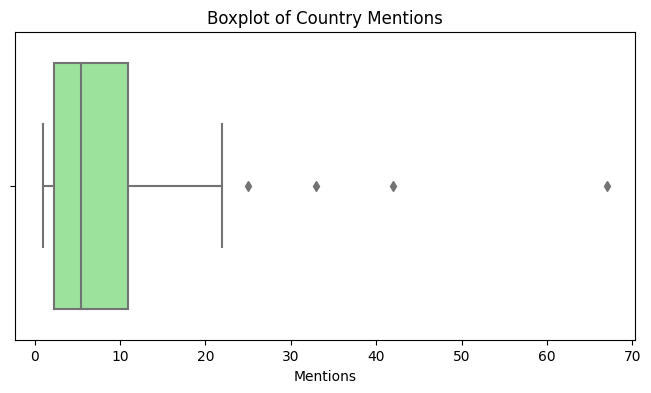

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Plot histogram of mention frequencies ---
plt.figure(figsize=(10,6))
sns.histplot(country_df["Mentions"], bins=20, kde=False, color="skyblue")
plt.title("Distribution of Country Mentions in 20th-Century Events Text")
plt.xlabel("Number of Mentions")
plt.ylabel("Number of Countries")
plt.show()

# --- Optional: boxplot for a different perspective ---
plt.figure(figsize=(8,4))
sns.boxplot(x=country_df["Mentions"], color="lightgreen")
plt.title("Boxplot of Country Mentions")
plt.xlabel("Mentions")
plt.show()


Long-tail distribution: 
Typically a few countries (like United States, Germany, Soviet Union, United Kingdom, France) dominate mentions, while most others appear only a handful of times.

This reflects the geopolitical power distribution in the 20th century—superpowers and colonial empires appear constantly in historical narratives, while smaller nations are mentioned less frequently.

The histogram will likely be right-skewed (a few countries with very high mentions, many with low mentions).

The boxplot helps visualize outliers (super high-frequency countries).


## Tokenize POS-tag

In [3]:
# load your 20th century events file
with open("20th_century_events_clean.txt", "r", encoding="utf-8") as f:
    text = f.read()

# now this will work
source_text = text
tokens = word_tokenize(source_text)


In [4]:
source_text = text


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/renatabatista/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/renatabatista/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/renatabatista/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/renatabatista/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/renatabatista/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


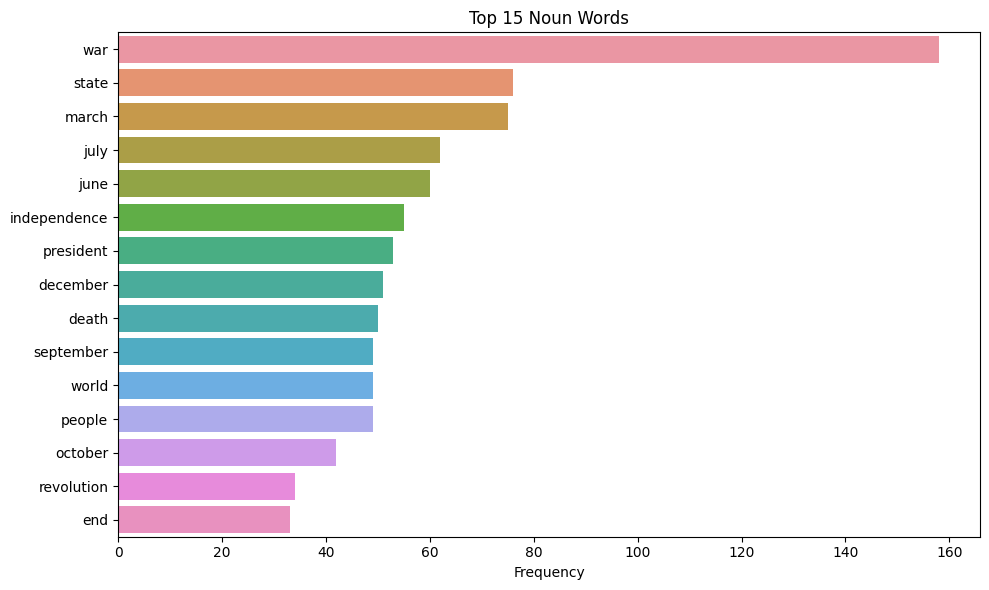

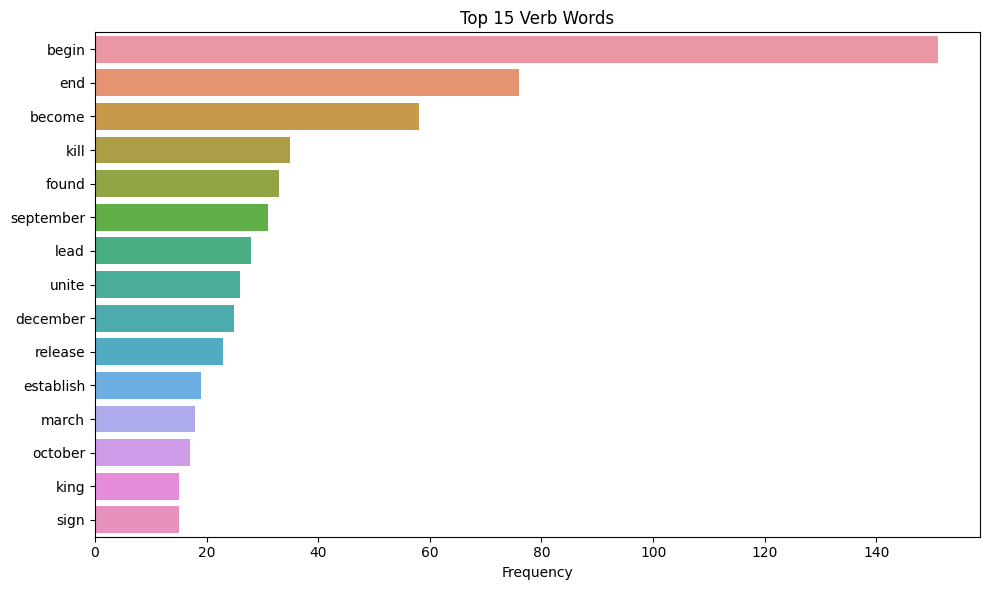

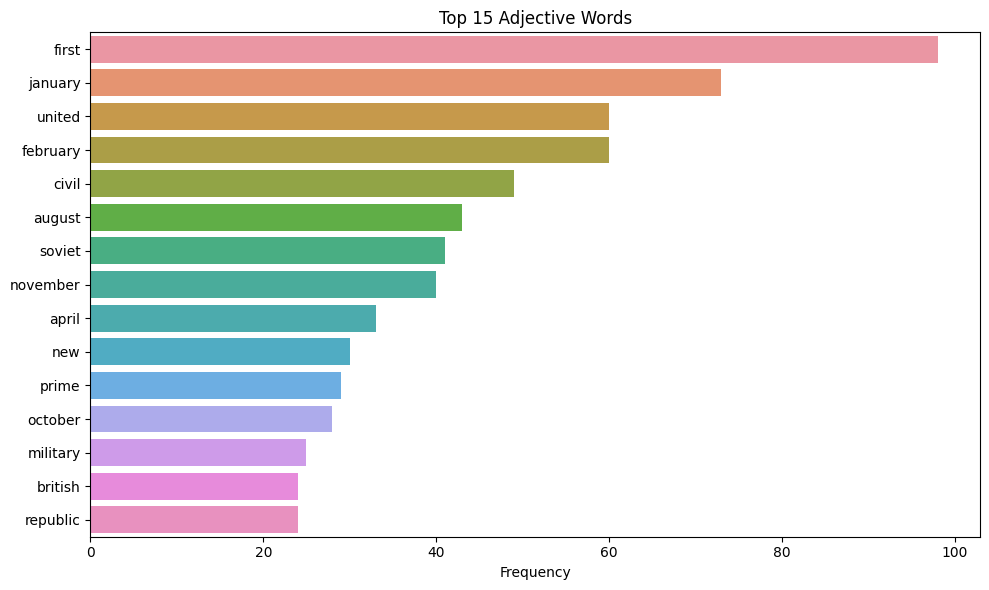

In [5]:
# --- TOP 15 WORDS PER POS (NOUN / VERB / ADJ) ---

import nltk, re, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import Counter

# one-time downloads (safe to re-run)
nltk.download('punkt'); nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet'); nltk.download('omw-1.4'); nltk.download('stopwords')

# 1) load text file (use your cleaned file if you have it)
with open("20th_century_events_clean.txt", "r", encoding="utf-8") as f:
    text = f.read()

# 2) tokenize + basic cleaning
stops = set(stopwords.words('english'))
tokens = word_tokenize(text)
tokens = [t.lower() for t in tokens if t.isalpha() and len(t) >= 3 and t.lower() not in stops]

# 3) POS tag
tagged = pos_tag(tokens)   # -> list of (word, tag)

# 4) lemmatize using coarse POS to merge variants (wars->war, running->run)
def wn_pos(tb_tag):
    if tb_tag.startswith('J'): return wordnet.ADJ
    if tb_tag.startswith('V'): return wordnet.VERB
    if tb_tag.startswith('N'): return wordnet.NOUN
    if tb_tag.startswith('R'): return wordnet.ADV
    return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
tagged_lemmas = [(lemmatizer.lemmatize(w, wn_pos(t)), t) for (w, t) in tagged]

# 5) define POS buckets
NOUN = {'NN','NNS','NNP','NNPS'}   # include proper nouns; drop NNP/NNPS to exclude them
VERB = {'VB','VBD','VBG','VBN','VBP','VBZ'}
ADJ  = {'JJ','JJR','JJS'}

def top_words(tagged_tokens, tagset, k=15):
    words = [w for (w,t) in tagged_tokens if t in tagset]
    counts = Counter(words).most_common(k)
    return pd.DataFrame(counts, columns=['word','count'])

top_nouns = top_words(tagged_lemmas, NOUN, 15)
top_verbs = top_words(tagged_lemmas, VERB, 15)
top_adjs  = top_words(tagged_lemmas, ADJ,  15)

# 6) plot
def plot_top(df, title):
    plt.figure(figsize=(10,6))
    sns.barplot(data=df, x='count', y='word')
    plt.title(title); plt.xlabel('Frequency'); plt.ylabel('')
    plt.tight_layout(); plt.show()

plot_top(top_nouns, 'Top 15 Noun Words')
plot_top(top_verbs, 'Top 15 Verb Words')
plot_top(top_adjs,  'Top 15 Adjective Words')

# 7) save (optional)
top_nouns.to_csv('top15_nouns.csv', index=False)
top_verbs.to_csv('top15_verbs.csv', index=False)
top_adjs.to_csv('top15_adjectives.csv', index=False)


In [7]:
keep = {'war','treaty','empire','army','revolution','independence','border','government'}
top_nouns = top_nouns[top_nouns['word'].isin(keep)]
